# Smartphone Battery Life Predictor
An ML model for prediction how much time a phone battery has left before it is depleted.

By: Mats van Liempd

Version: 0.0.1

In [61]:
import sklearn as skl
import numpy as np
import matplotlib as mpl
import seaborn as sb
import pandas as pd

In [62]:
data = pd.read_csv("datasets/Data Collection Smartphone Battery Life_expanded.csv")
data.head()
data.sort_values(by="sessionlength", ascending=False)

,id,userage,usergender,userphone,phoneos,batteryhealth,startbatterypercentage,endbatterypercentage,sessionlength,timedonphone,appcount,screenbrightness,usednetwork,usedbluetooth,usedGPS,usedbatterysaving,batterycapacity_mAh
7,8,26,Man,iPhone 17 Pro Max,iOs,100,100,73,18034.0,No,4,100.0,Yes,No,No,No,5088
12,13,24,Man,iPhone 16,iOs,100,100,64,18034.0,No,4,100.0,Yes,No,No,No,3561
8,9,26,Man,iPhone 17 Pro,iOs,100,100,66,18034.0,No,4,100.0,Yes,No,No,No,4252
10,11,25,Man,iPhone 17,iOs,100,100,64,18034.0,No,4,100.0,Yes,No,No,No,3692
13,14,25,Man,Samsung Galaxy S25 Ultra,Android,100,100,69,18034.0,No,4,100.0,Yes,No,No,No,5000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
36,37,69,Non-binary,iPhone Air,iOs,80,76,68,97.6,No,5,96.0,Yes,Yes,No,No,3149
64,65,39,Man,iPhone Air,iOs,85,71,65,84.8,No,6,22.0,Yes,Yes,No,No,3149
61,62,17,Man,Google Pixel 8,Android,95,96,92,72.5,No,7,98.0,Yes,No,No,No,4575
26,27,49,Woman,Galaxy S6 Edge,Android,86,91,89,60.0,No,6,89.0,Yes,Yes,Yes,No,2600


In [63]:
df = pd.DataFrame(data)
df = df.drop(columns=["id"])

# change phoneos to 0 (iOs) and 1 (Android) 
df["phoneos"] = df["phoneos"].str.strip().str.lower().map({
    "ios": 0,
    "android": 1
})

# change all yes/no collumns in the data set to 1/0 booleans
yes_no_cols = [
    col for col in df.columns
    if df[col].astype(str).str.lower().isin(["yes", "no"]).any() and col != "phoneos"
]

for col in yes_no_cols:
    df[col] = df[col].astype(str).str.strip().str.lower().map({
        "yes": 1,
        "no": 0
    })

# converting gender options to numerical values
df["usergender"] = df["usergender"].str.strip().str.lower().map({
    "man": 0,
    "woman": 1,
    "non-binary": 2,
    "prefer not to say": 3
})

df.sample(5)

,userage,usergender,userphone,phoneos,batteryhealth,startbatterypercentage,endbatterypercentage,sessionlength,timedonphone,appcount,screenbrightness,usednetwork,usedbluetooth,usedGPS,usedbatterysaving,batterycapacity_mAh
125,64,2,Galaxy S7 Edge,1,87,77,76,700.5,1,7,24.0,1,0,0,1,3600
12,24,0,iPhone 16,0,100,100,64,18034.0,0,4,100.0,1,0,0,0,3561
103,30,1,iPhone 17 Pro Max,0,95,97,91,848.7,1,4,36.0,1,1,0,1,5088
101,64,0,Galaxy S7 Edge,1,90,73,66,863.2,1,5,100.0,1,1,0,0,3600
118,32,1,Galaxy S25 Edge,1,94,91,89,946.5,1,6,27.0,1,0,1,1,3900


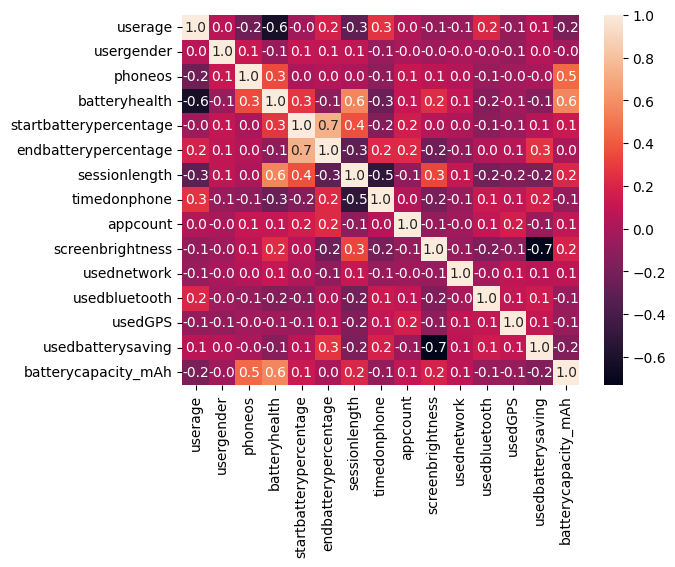

In [64]:
# correlations = df.corr()
correlations = df.select_dtypes(include='number').corr()
plot = sb.heatmap(correlations, cbar=True, annot=True, fmt=".1f")